# Çevrimiçi Ödemelerde Sahtekarlığın Anlaşılması

## Problemin Tanımı
Günümüzde son kullanıcılar için çevrimiçi alışveriş git gide artan öneme sahip olmakla beraber bu satışı yapan firmalar için ödemelerde sahtekarlığın anlaşılması ve ödemenin o anda reddedilmesi firma için büyük önem arz etmektedir. Çünkü anlaşılmayan sahtekarlık firmanın iade ve iptal süreçleriyle uğraşması ve postalanan ürünün geri alınamaması ya da son kullanıcının zarar etmesi sonuçlarını doğurmaktadır. Bunların engellenmesi çevrimiçi ödeme platformları için büyük bir sorundur.

2020 yılında e-ticaret siteleri çevrimiçi ödemelerdeki sahtekarlıklar yüzünden 20 milyar dolardan fazla zarar etti. Bu sayı 2022 yılında 41 milyar dolar oldu ve 2023 yılında ise 48 milyar doları aşması beklenmektedir.
E-ticaret sitelerin bu sahtekarlıklarla klasik yordamlarla ya da insan gücüyle başa çıkması imkansız bir görevidr. 

## Problemin Çözümü

Günümüz dünyasında milyonlarca insanın artık çevrimiçi alışveriş yaptığı düşünülürse ve bu sayının hiç bir zaman azalmayıp her zaman artacağı da eklenirse bu problemin çözümü ancak yapay zeka tarafından yapılabileceği analşılır. Problemin çözümü için kaggle üzerinden bulunan veri setinde KNN, Naive Bayes, Lojistik Regresyon, Karar Ağaçları, Rastgele Orman, Gradient Arttırma ve Karar Destek Sistemleri algoritmalarıyla modeller denenmiş ve sonuçları karşılaştırmalı olarak gösterilmiştir.

# Literatür Taraması

Ulusal Tez Merkezi'nde "fraud" kelimesiyle yapılan aramada 106 adet Bilgisayar Mühendisliği ait tez bulunmaktadır. Bu veri setini doğrudan kullanan bir makale ya da tez bulunamamıştır. Ama PCA ile döüştürülmüş creditcard.csv üzerine 2 adet tez bulunup incelenmiştir.

1- ) Four Classification Methods Naïve Bayesian, Support Vector Machine, K-Nearest Neighbors and Random Forest Are Tested For Credit Card Fraud Detection - LAYTH RAFEA HAZIM

Tezinde kredi kartında sahtekarlığın tespitini 4 adet sınıflandırma algoritmasıyla incelemiştir. Bulduğu sonuçlar ise NB 97.46%, SVM 95.04%, KNN 97.55% and RF 97.7%'dir. Veri seti burada kullanılan verisetiyle aynıdır.

2-) Kredi Kartı Sahte İşlem Tespiti - Kazım SOYLU

Tezinde aynı veri setini kullanmış olup Derin öğrenme, Rastgele orman ve Yığınlar üzerinde çalışmıştır. Bu algoritmaların sonuçlarını grafiksel olarak paylaşmıştır. Kesinlik değerinde Rastgele orman daha iyi performans vermiş olup, sahte işlem tespitinde oranında ise Yığın daha başarılı olmuştur.

Not: Sınıflandırıcı yığınında temel öğrenici olarak derin öğrenme ve rastgele orman modelleri kullanılmış, meta öğrenici olarak da yine rastgele orman algoritması kullanılmıştır.

In [1]:
import numpy as np
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, RocCurveDisplay, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

pd.set_option("display.precision", 2)
frac = 0.000002

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/MachineLearning/Project/Datasets/onlinefraud.csv"
dataset = pd.read_csv(path);

## Özniteliklerin incelenmesi

In [ ]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

***step***: 1 adımın 1 saate eşit olduğu bir zaman birimini temsil eder.

***type***: İşlemin tipi

***amount***: İşlemin miktarı

***nameOrig***: Müşternin işleme başlaması

***oldbalanceOrg***: İşlemden önce bakiye

***newbalanceOrig***: İşlemden sonra bakiye

***nameDest***: İşlemin alıcısı

***oldbalanceDest***: İşlemden önce alıcının ilk bakiyesi

***newbalanceDest***: İşlemden sonra alıcının ilk bakiyesi

***isFraud***: Sahtecilik mi değil mi

**isFlaggedFraud**: -

## Veri setinin içeriğini kontrol ediyoruz

In [ ]:
print("Satır Sayısı: {}".format(dataset.shape[0]))
print("Öznitelik Syısı: {}".format(dataset.shape[1]))
print("Fraud İşlem Sayısı: {}".format(dataset[dataset['isFraud'] == 1].shape[0]))
print("FraudFlagged İşlem Sayısı: {}".format(dataset[dataset['isFlaggedFraud'] == 1].shape[0]))

Satır Sayısı: 6362620
Öznitelik Syısı: 11
Fraud İşlem Sayısı: 8213
FraudFlagged İşlem Sayısı: 16


In [ ]:
dataset.sample(frac=frac)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4977938,352,PAYMENT,27700.54,C2037956552,9.93e+02,0.00e+00,M106574028,0.00e+00,0.00e+00,0,0
1686412,159,PAYMENT,8707.09,C429505402,4.62e+04,3.75e+04,M714483173,0.00e+00,0.00e+00,0,0
2850521,227,PAYMENT,4794.52,C259790546,1.57e+04,1.09e+04,M256629552,0.00e+00,0.00e+00,0,0
2235814,186,CASH_IN,119659.21,C1218551850,1.04e+04,1.30e+05,C1858597234,2.51e+04,0.00e+00,0,0
3691211,277,PAYMENT,6493.93,C863236076,5.19e+04,4.54e+04,M538213976,0.00e+00,0.00e+00,0,0
5129573,356,CASH_OUT,82470.08,C908281214,1.26e+05,4.34e+04,C243254615,6.91e+05,7.74e+05,0,0
4384416,312,CASH_IN,64939.68,C1599508279,7.49e+06,7.56e+06,C1710753759,1.43e+05,7.77e+04,0,0
142642,11,DEBIT,408.62,C1695119245,5.57e+03,5.17e+03,C1307749453,3.86e+05,3.87e+05,0,0
290188,15,CASH_IN,1178.99,C1575640852,1.01e+06,1.01e+06,C757108857,3.57e+06,3.57e+06,0,0
3106558,235,CASH_IN,46845.28,C1030386243,2.20e+05,2.67e+05,C1182974748,7.25e+05,6.78e+05,0,0


Verilerin sütunlara göre kaç adet non-null veri içerdiği ve veri tipinin gösterimi yapılmıştır.

In [ ]:
dataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Veri setinin istatiksel bilgilerinin gösterilmiştir (count mean std vb)

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6.36e+06,2.43e+02,1.42e+02,1.0,156.00,239.00,3.35e+02,7.43e+02
amount,6.36e+06,1.80e+05,6.04e+05,0.0,13389.57,74871.94,2.09e+05,9.24e+07
oldbalanceOrg,6.36e+06,8.34e+05,2.89e+06,0.0,0.00,14208.00,1.07e+05,5.96e+07
newbalanceOrig,6.36e+06,8.55e+05,2.92e+06,0.0,0.00,0.00,1.44e+05,4.96e+07
oldbalanceDest,6.36e+06,1.10e+06,3.40e+06,0.0,0.00,132705.66,9.43e+05,3.56e+08
newbalanceDest,6.36e+06,1.22e+06,3.67e+06,0.0,0.00,214661.44,1.11e+06,3.56e+08
isFraud,6.36e+06,1.29e-03,3.59e-02,0.0,0.00,0.00,0.00e+00,1.00e+00
isFlaggedFraud,6.36e+06,2.51e-06,1.59e-03,0.0,0.00,0.00,0.00e+00,1.00e+00


Kategorik Değişkenlerin de incelenmesi görülmüştür.

In [ ]:
dataset.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.4,142.33,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.9,603858.23,0.0,13389.57,74871.94,208721.48,92445516.64
nameOrig,6362620,6353307,C1902386530,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.1,2888242.67,0.0,0.0,14208.0,107315.18,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.67,2924048.5,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.67,3399180.11,0.0,0.0,132705.66,943036.71,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.4,3674128.94,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.0,0.04,0.0,0.0,0.0,0.0,1.0


In [ ]:
dataset['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

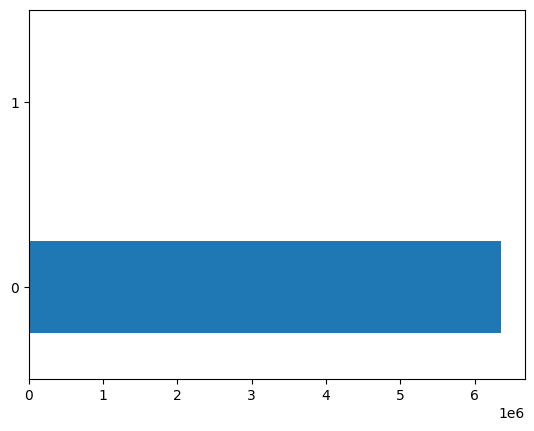

In [ ]:
dataset['isFraud'].value_counts().plot.barh();

## Kategorik Özniteliklerin incelenmesi

nameOrig ve nameDest değişkenlerinin,yukarıda gördüğümüz üzer benzersiz değerleri çok fazla olduğu için incelenmemiştir.

In [10]:
dataset.drop(['nameOrig', 'nameDest'], axis=1, inplace = True)

In [ ]:
categoricalColumns = dataset.select_dtypes(include = ["object"])

In [ ]:
categoricalColumns.sample(frac=frac)

,type
1876279,CASH_OUT
2803154,PAYMENT
3770287,CASH_OUT
737163,PAYMENT
5771808,CASH_IN
4919702,PAYMENT
2257693,CASH_IN
865543,CASH_IN
1133631,CASH_OUT
357116,CASH_IN


In [ ]:
categoricalColumns["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
categoricalColumns["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

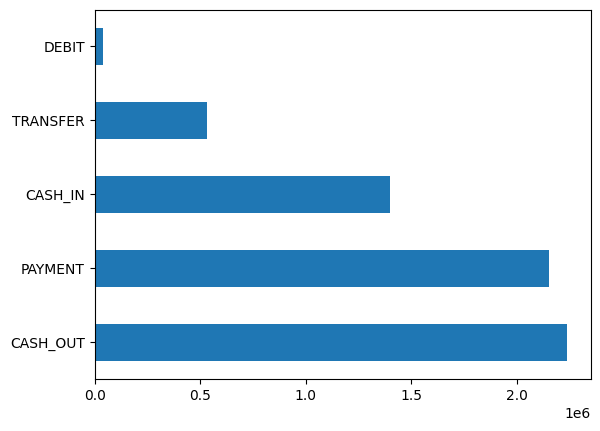

In [ ]:
categoricalColumns["type"].value_counts().plot.barh();

In [ ]:
type = dataset["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(dataset, values=quantity, names=transactions, hole = 0.5, title="İşlemlerin Dağılımı")
figure.show()

## Nicel Analiz

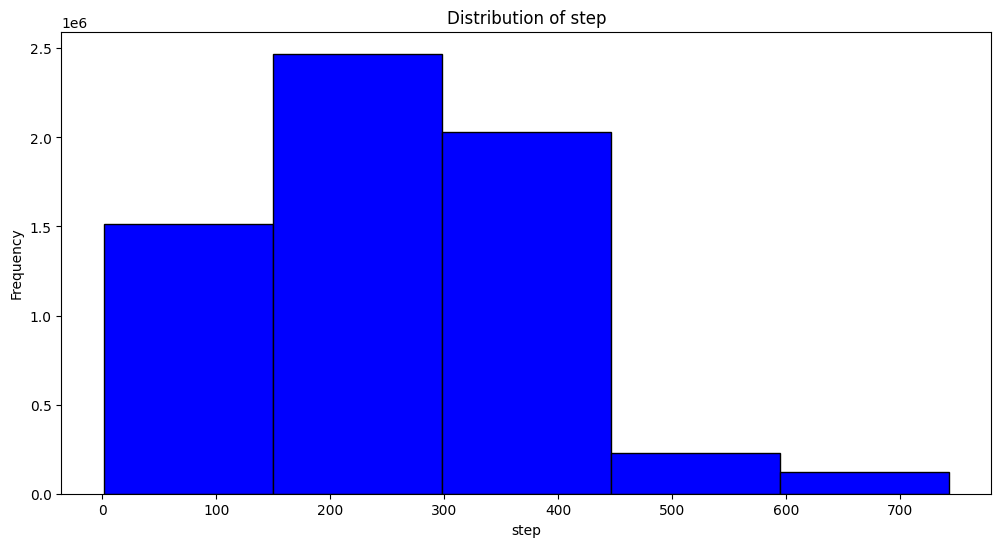

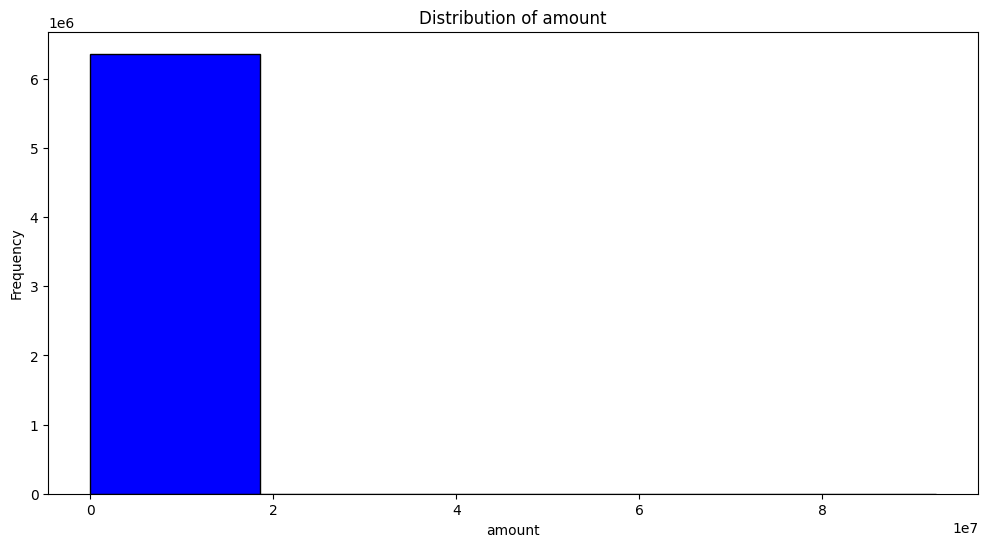

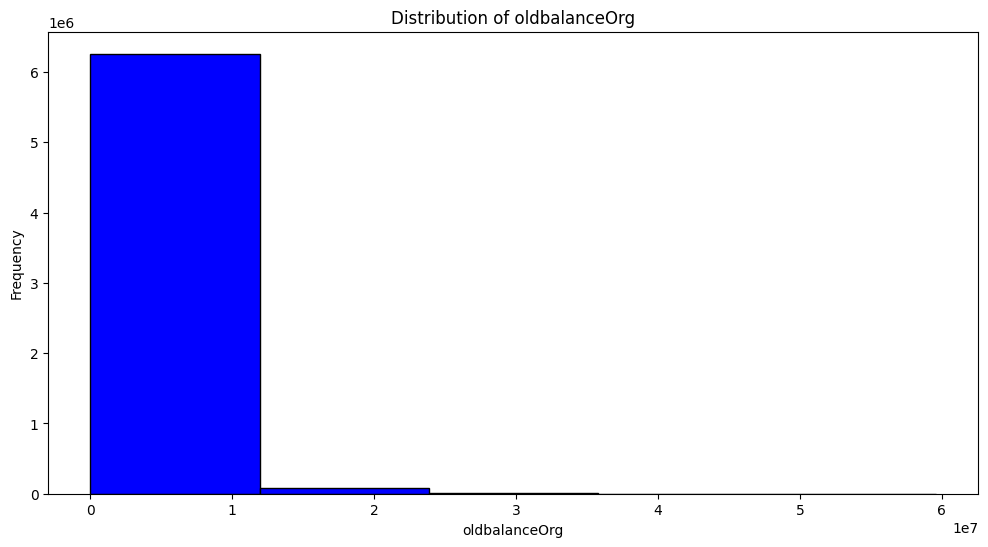

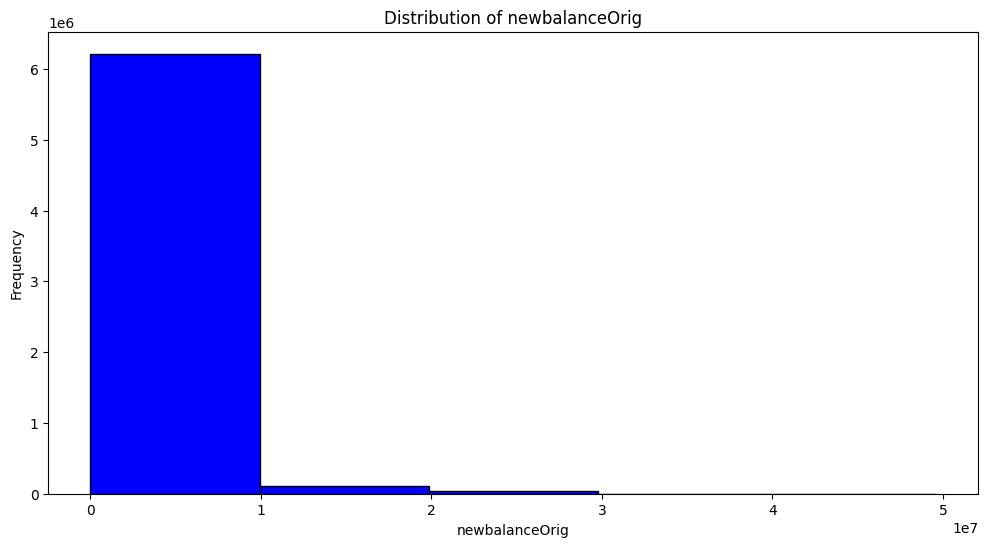

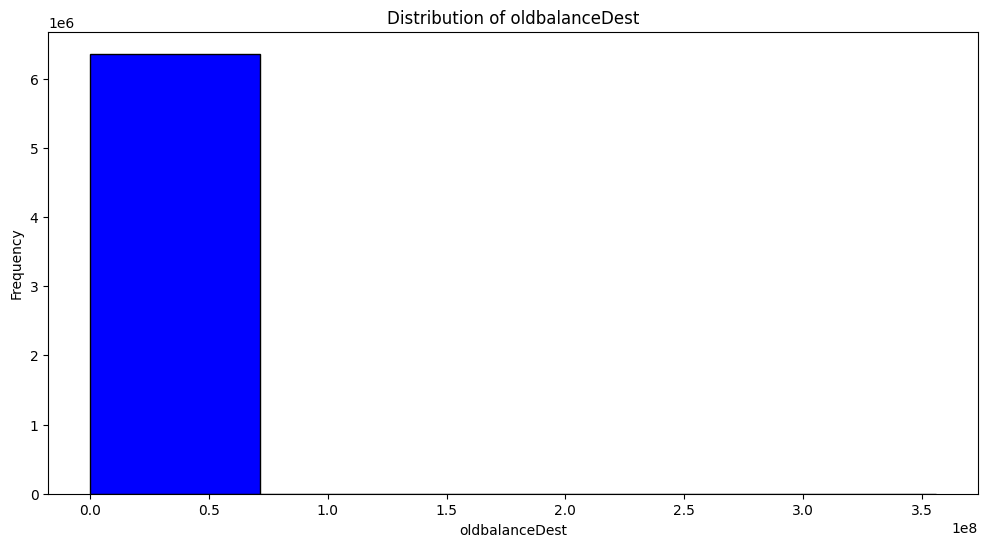

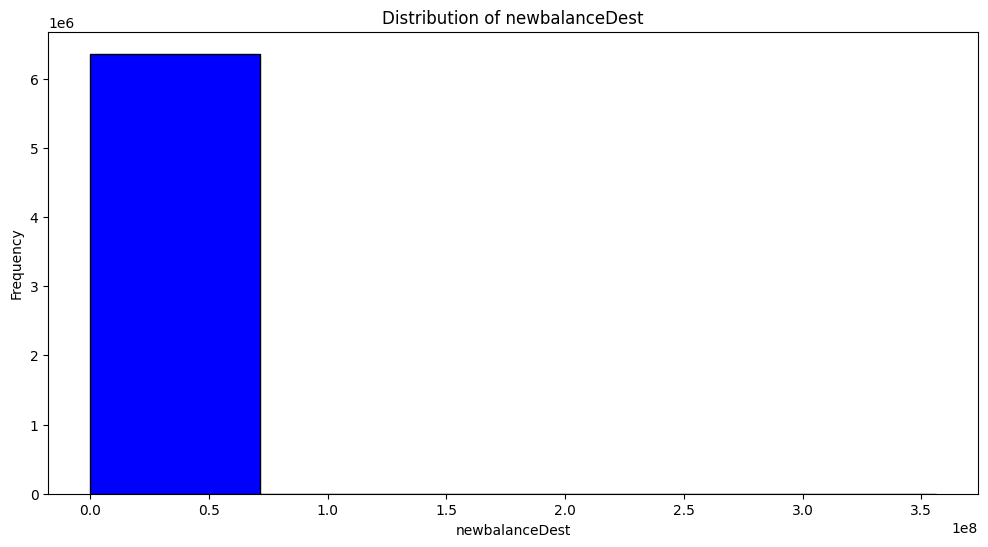

In [ ]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    dataset[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='blue',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()

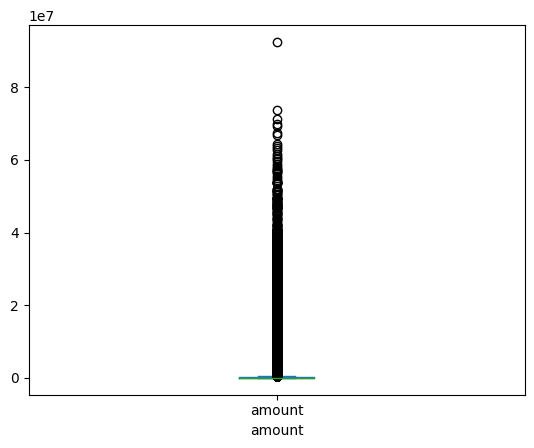

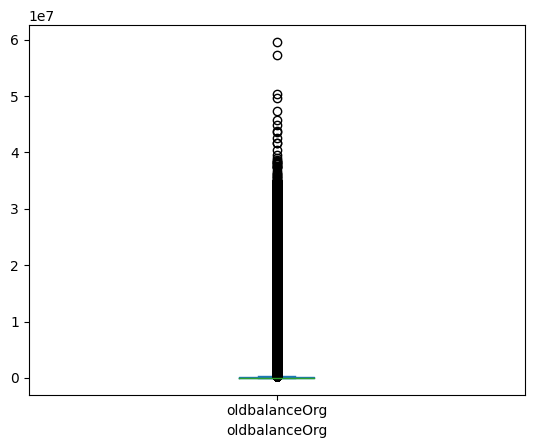

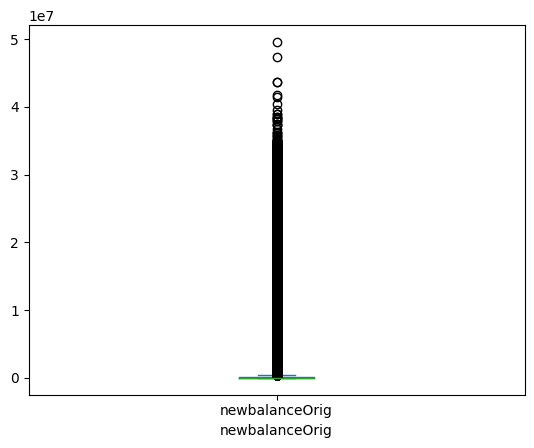

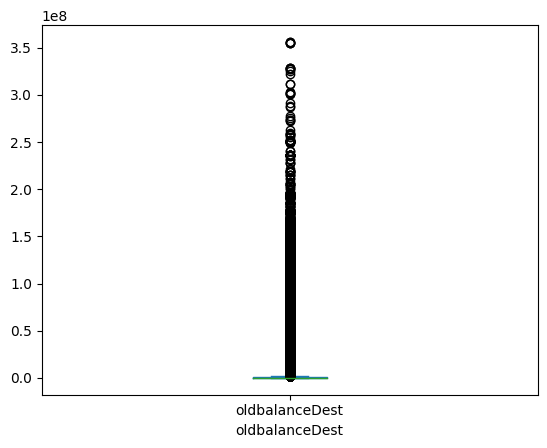

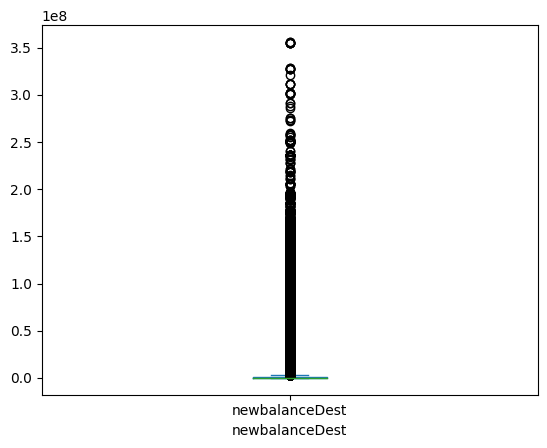

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    dataset[i].plot(kind='box')
    plt.show()

In [ ]:
CrosstabResult=pd.crosstab(index=dataset.type,columns=dataset.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


(3500.0, 7000.0)

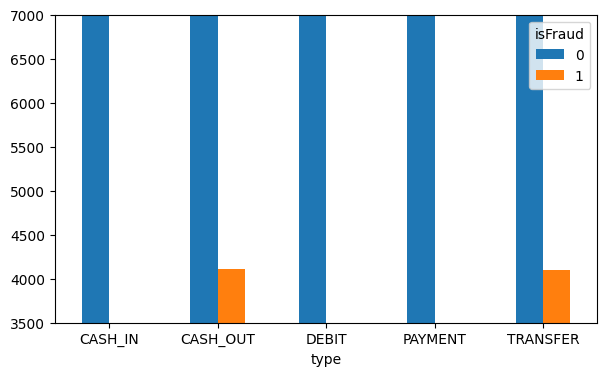

In [ ]:
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

## Korelasyonların İncelenmesi

<ipython-input-21-57531510a166>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



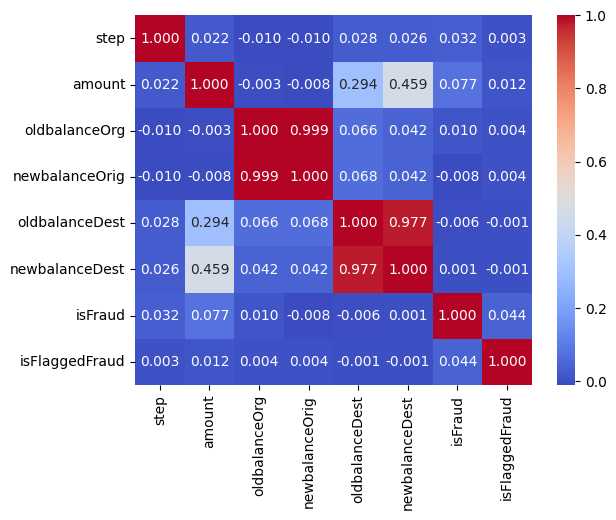

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm' ,fmt=".3f");

## Boxplotların çizimi

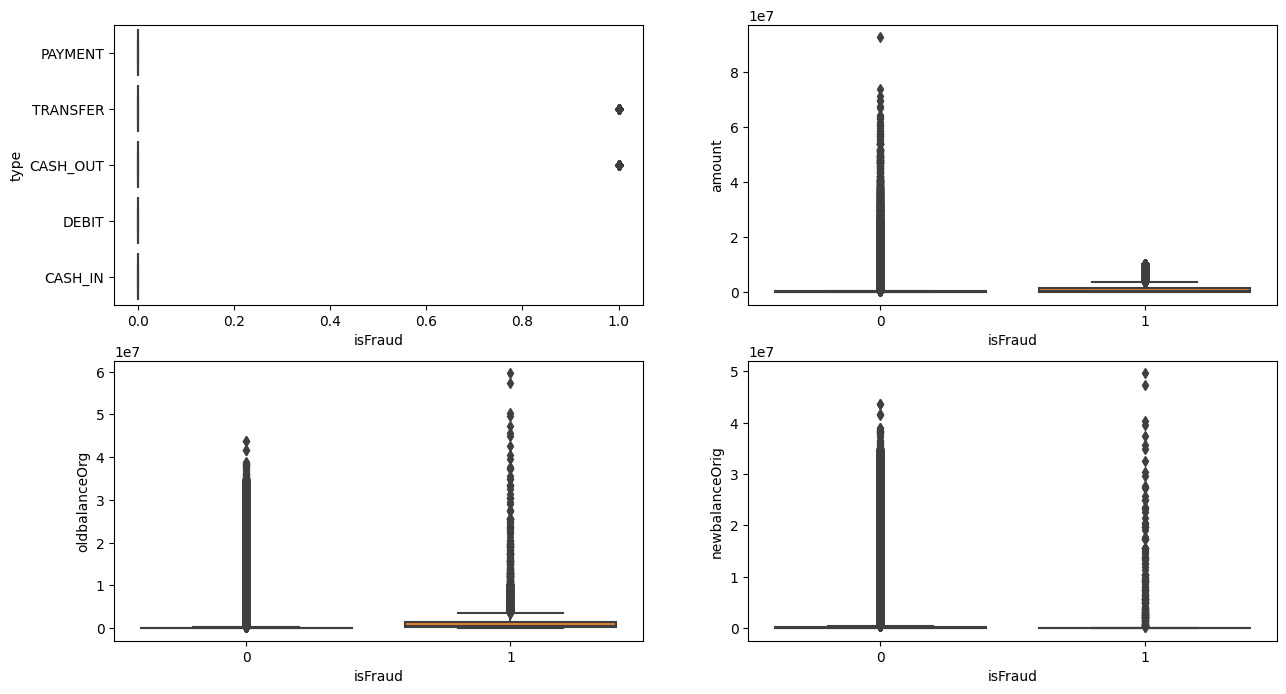

In [ ]:
columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i, col in enumerate(columns):
    sns.boxplot(x="isFraud", y=col, data=dataset, ax=ax[i//2][i%2])

## Histogramların Çizdirilmesi

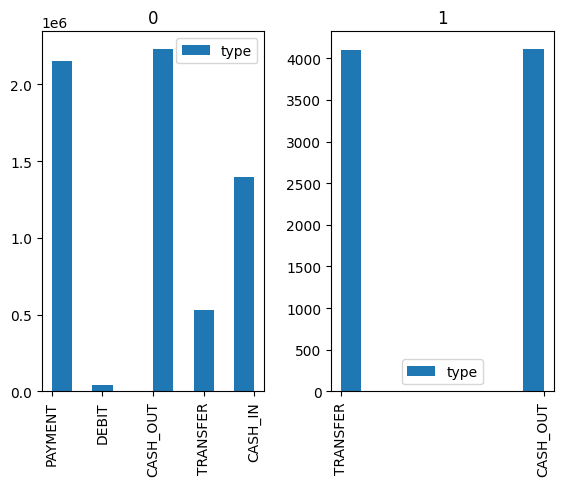

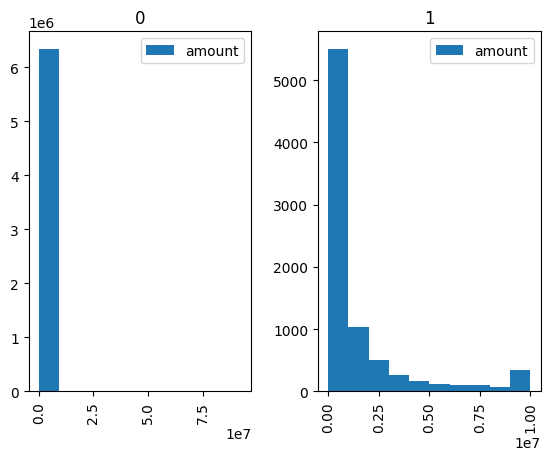

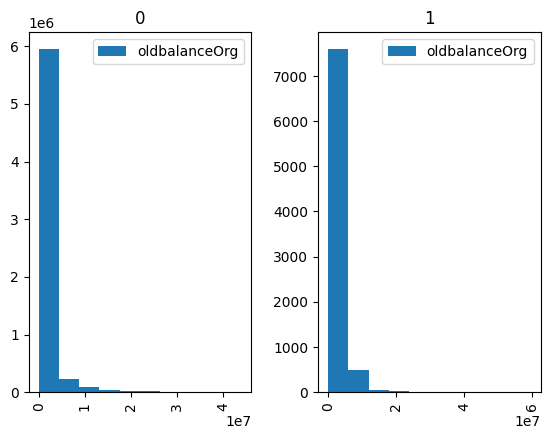

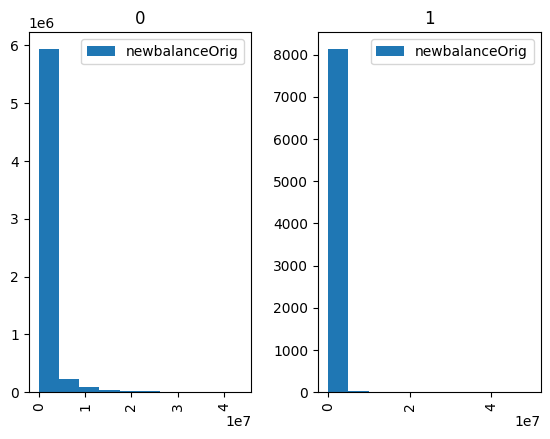

In [ ]:
for i, column in enumerate(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']):
  dataset[column].hist(by=dataset["isFraud"], legend=True)

## Eski Bakiye ile Yeni Bakiye Farkının Sütun Olarak Eklenmesi

In [3]:
dataset['balance_diff'] = dataset.oldbalanceOrg - dataset.newbalanceOrig
dataset.balance_diff.describe()

count    6.36e+06
mean    -2.12e+04
std      1.47e+05
min     -1.92e+06
25%      0.00e+00
50%      0.00e+00
75%      1.02e+04
max      1.00e+07
Name: balance_diff, dtype: float64

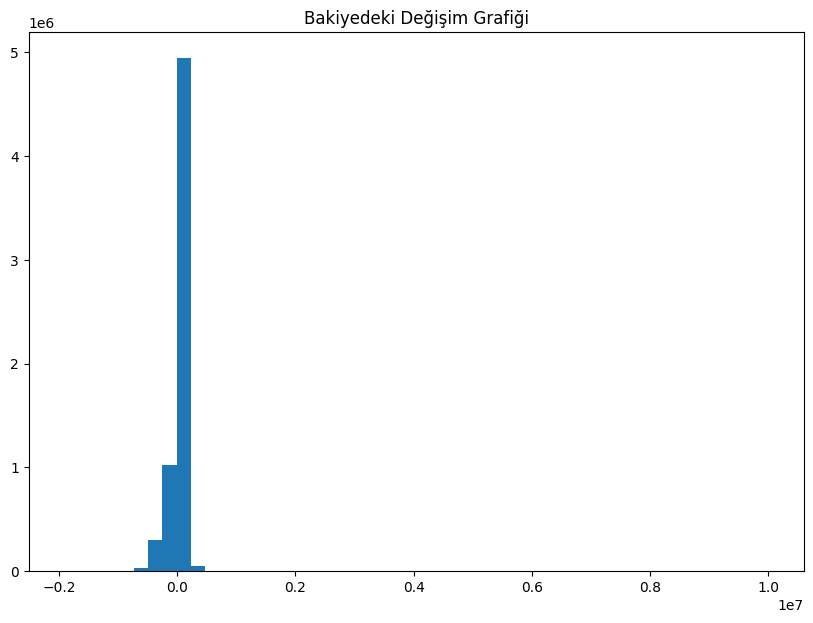

In [ ]:
plt.figure(figsize = [10,7])
plt.hist(dataset.balance_diff, bins=50)
plt.title('Bakiyedeki Değişim Grafiği')
plt.show()

## Örnek Sayılarını Eşitleme

<img src="https://miro.medium.com/max/725/1*H6XodlitlGDl9YdbwaZLMw.png" alt="Under & Oversampling" width="600" height="300">

### Resampling
Yeniden örnekleme(Resampling), azınlık sınıfına yeni örnekler ekleyerek veya çoğunluk sınıfından örnekler çıkarılarak veri setinin daha dengeli hale getirilmesidir.

Undersampling, çoğunluk sınıfına ait örneklerin çıkarılmasıyla veri setini dengeleme tekniğidir.

Oversampling, azınlık sınıfına ait örneklerin kopyalanmasıyla veri setini dengeler.

In [ ]:
class_count_0, class_count_1 = dataset['isFraud'].value_counts()
class_0 = dataset[dataset['isFraud'] == 0]
class_1 = dataset[dataset['isFraud'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6354407, 10)
class 1: (8213, 10)


0    8213
1    8213
Name: isFraud, dtype: int64


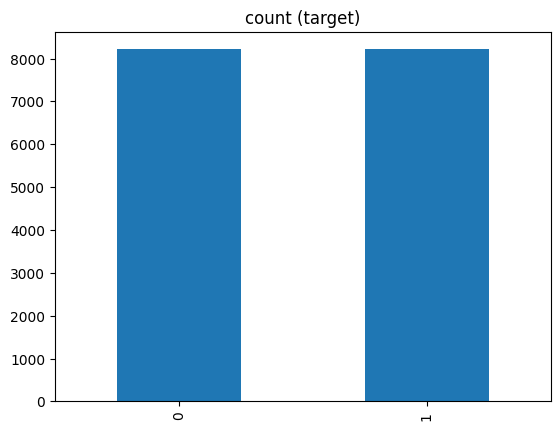

In [ ]:
class_0_under = class_0.sample(class_count_1)
balancing_data = pd.concat([class_0_under, class_1], axis=0)
print(balancing_data['isFraud'].value_counts())
balancing_data['isFraud'].value_counts().plot(kind='bar', title='count (target)');

In [ ]:
balancing_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
4420345,322,TRANSFER,122936.76,0.00e+00,0.00e+00,211821.25,334758.01,0,0,0.00
3757217,279,CASH_IN,510077.14,4.77e+06,5.28e+06,538095.75,28018.61,0,0,-510077.13
2135955,184,CASH_IN,123301.25,5.22e+04,1.76e+05,510817.66,387516.41,0,0,-123301.25
3643386,275,CASH_OUT,79020.11,2.62e+04,0.00e+00,0.00,79020.11,0,0,26158.00
1668497,158,PAYMENT,1165.03,0.00e+00,0.00e+00,0.00,0.00,0,0,0.00


In [ ]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 4420345 to 6362619
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   oldbalanceDest  16426 non-null  float64
 6   newbalanceDest  16426 non-null  float64
 7   isFraud         16426 non-null  int64  
 8   isFlaggedFraud  16426 non-null  int64  
 9   balance_diff    16426 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1.4+ MB


## Eğitim ve Test setlerinin ayrılması

Öncelikle X ve y olarak ayrılmış olup daha sonra X içerisinde kalan kategorik değişkenin dönüşümü yapılmıştır.

In [ ]:
y = balancing_data['isFraud']
X = balancing_data.drop(['step', 'oldbalanceDest','newbalanceDest', 'isFraud', 'isFlaggedFraud'], axis=1)
X = pd.get_dummies(X,drop_first=True)
X.head()

,amount,oldbalanceOrg,newbalanceOrig,balance_diff,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4420345,122936.76,0.00e+00,0.00e+00,0.00,0,0,0,1
3757217,510077.14,4.77e+06,5.28e+06,-510077.13,0,0,0,0
2135955,123301.25,5.22e+04,1.76e+05,-123301.25,0,0,0,0
3643386,79020.11,2.62e+04,0.00e+00,26158.00,1,0,0,0
1668497,1165.03,0.00e+00,0.00e+00,0.00,0,0,1,0


In [ ]:
print("X Yapısı: {}".format(X.shape))
print("y Yapısı : {}".format(y.shape))

X Yapısı: (16426, 8)
y Yapısı : (16426,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Eğitim seti satır sayısı: {}".format(X_train.shape[0]))
print("Test seti satır sayısı: {}".format(X_test.shape[0]))

Eğitim seti satır sayısı: 13140
Test seti satır sayısı: 3286


In [ ]:
X_train.head()

,amount,oldbalanceOrg,newbalanceOrig,balance_diff,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
5789149,2.41e+04,0.00e+00,0.00,0.00e+00,1,0,0,0
830897,8.27e+04,0.00e+00,0.00,0.00e+00,1,0,0,0
6201836,1.54e+06,1.54e+06,0.00,1.54e+06,1,0,0,0
3659306,4.70e+03,2.08e+04,16140.09,4.70e+03,0,0,1,0
5823715,5.40e+04,2.01e+05,255147.52,-5.40e+04,0,0,0,0


In [ ]:
y_train.head()

5789149    0
830897     0
6201836    1
3659306    0
5823715    0
Name: isFraud, dtype: int64

## Ölçekleme

In [ ]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Gerekli Methodların Tanımlanması

In [46]:
def show_roc_curve(model, model_name, X_test, y_test):
  y_scores = model.predict_proba(X_test)
  fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
  roc_auc = auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic of ' + model_name)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve of ' + model_name)
  plt.show()

In [ ]:
model_performance = pd.DataFrame(columns=['Training Time', 'Test Time', 'Accuracy','Recall','Precision','F1-Score'])

In [47]:
def add_scores(y_test, y_test_pred, model_name, training_time, test_time):
  acc = accuracy_score(y_test, y_test_pred)
  rec = recall_score(y_test, y_test_pred)
  prec = precision_score(y_test, y_test_pred)
  f1 = f1_score(y_test, y_test_pred)
  model_performance.loc[model_name] = [training_time, test_time, acc, rec, prec, f1]
  print(model_performance.sort_values("F1-Score", ascending=False))

In [48]:
def accuracy_graph(gscv):
  test_scores = gscv.cv_results_['mean_test_score']
  train_scores = gscv.cv_results_['mean_train_score'] 

  plt.plot(test_scores, label='test')
  plt.plot(train_scores, label='train')
  plt.legend(loc='best')
  plt.show()

# KNN Modeli

KNN en basit anlamı ile içerisinde tahmin edilecek değerin bağımsız değişkenlerinin oluşturduğu vektörün en yakın komşularının hangi sınıfta yoğun olduğu bilgisi üzerinden sınıfını tahmin etmeye dayanır.

In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1, 20, 2), 
    'p': np.arange(1,4)
}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X_train_scaled, y_train)
pd.DataFrame(knn_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,1,0,4,2,3
mean_fit_time,0.01,0.01,0.01,0.01,0.02
std_fit_time,0.0,0.0,0.0,0.01,0.0
mean_score_time,0.1,0.13,0.1,0.33,0.15
std_score_time,0.0,0.03,0.0,0.09,0.05
param_n_neighbors,1,1,3,1,3
param_p,2,1,2,3,1
params,"{'n_neighbors': 1, 'p': 2}","{'n_neighbors': 1, 'p': 1}","{'n_neighbors': 3, 'p': 2}","{'n_neighbors': 1, 'p': 3}","{'n_neighbors': 3, 'p': 1}"
split0_test_score,0.99,0.99,0.99,0.99,0.99
split1_test_score,0.99,0.99,0.99,0.99,0.99
split2_test_score,0.99,0.99,0.99,0.99,0.99


In [ ]:
print(f"En iyi parametreler {knn_gscv.best_params_}, en iyi skor {knn_gscv.best_score_}")

En iyi parametreler {'n_neighbors': 1, 'p': 2}, en iyi skor 0.988736681887367


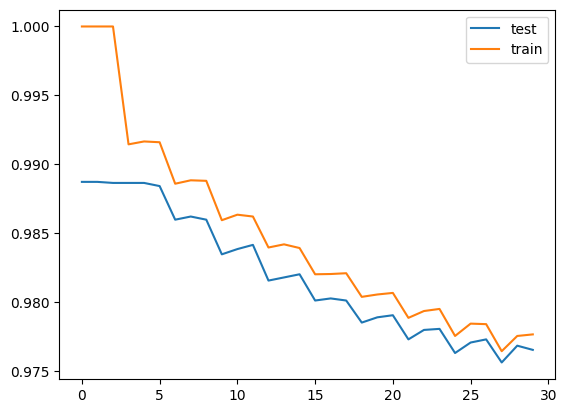

In [ ]:
accuracy_graph(knn_gscv)

In [ ]:
start = time.time()
best_knn = KNeighborsClassifier(n_neighbors=1, p=2)
best_knn.fit(X_train_scaled, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 0.020747661590576172s


In [ ]:
start = time.time()
y_test_pred = best_knn.predict(X_test_scaled)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.25227952003479004s


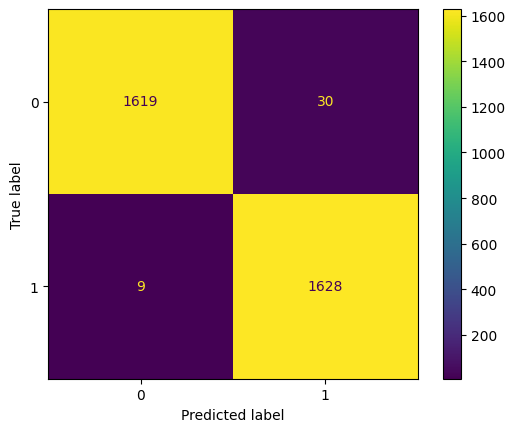

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.99      0.98      0.99      1649
       Fraud       0.98      0.99      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



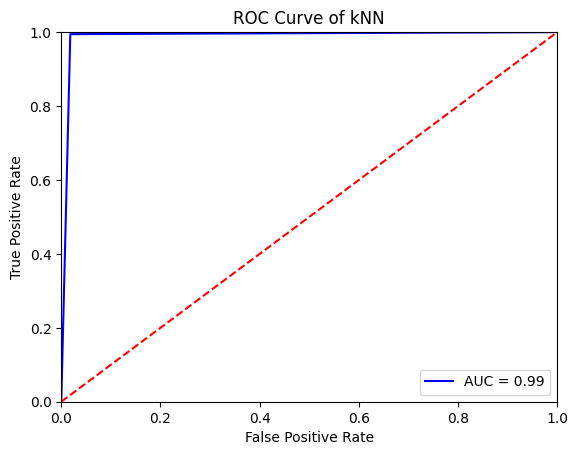

In [ ]:
show_roc_curve(best_knn, 'kNN', X_test_scaled, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "kNN", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
kNN           0.02       0.25      0.99    0.99       0.98      0.99


## Naive Bayes

Naive Bayes sınıflandırıcısının temeli Bayes teoremine dayanır. Tembel bir öğrenme algoritmasıdır aynı zamanda dengesiz veri kümelerinde de çalışabilir. Algoritmanın çalışma şekli bir eleman için her durumun olasılığını hesaplar ve olasılık değeri en yüksek olana göre sınıflandırır.

In [ ]:
nb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nb_gscv = GridSearchCV(nb, param_grid, cv=5, return_train_score=True)
nb_gscv.fit(X_train, y_train);
pd.DataFrame(nb_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,99,79,77,75,74
mean_fit_time,0.01,0.01,0.01,0.01,0.01
std_fit_time,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0
param_var_smoothing,0.0,0.0,0.0,0.0,0.0
params,{'var_smoothing': 1e-09},{'var_smoothing': 6.579332246575682e-08},{'var_smoothing': 1e-07},{'var_smoothing': 1.519911082952933e-07},{'var_smoothing': 1.873817422860383e-07}
split0_test_score,0.78,0.78,0.78,0.78,0.78
split1_test_score,0.78,0.78,0.78,0.78,0.78
split2_test_score,0.78,0.78,0.78,0.78,0.78
split3_test_score,0.77,0.77,0.77,0.77,0.77


In [ ]:
print(f"En iyi parametreler {nb_gscv.best_params_}, en iyi skor {nb_gscv.best_score_}")

En iyi parametreler {'var_smoothing': 3.5111917342151275e-06}, en iyi skor 0.7737442922374429


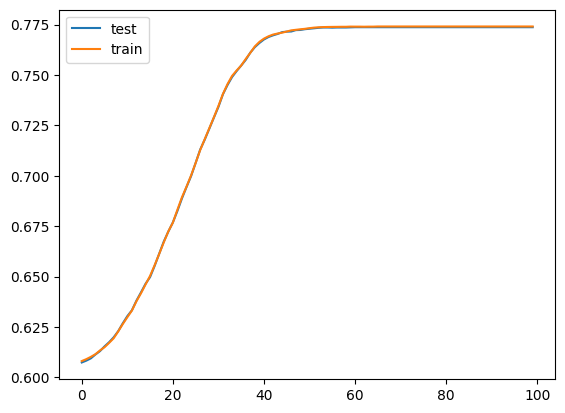

In [ ]:
accuracy_graph(nb_gscv)

In [ ]:
start = time.time()
best_nb = GaussianNB(var_smoothing=3.5111917342151275e-06)
best_nb.fit(X_train_scaled, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 0.006981372833251953s


In [ ]:
start = time.time()
y_test_pred = best_nb.predict(X_test_scaled)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.0011012554168701172s


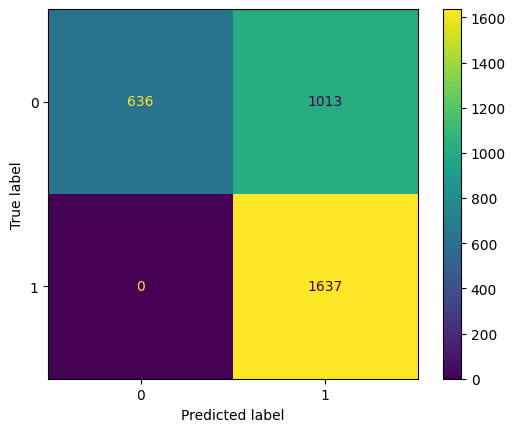

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       1.00      0.39      0.56      1649
       Fraud       0.62      1.00      0.76      1637

    accuracy                           0.69      3286
   macro avg       0.81      0.69      0.66      3286
weighted avg       0.81      0.69      0.66      3286



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GaussianNB was fitted without feature names



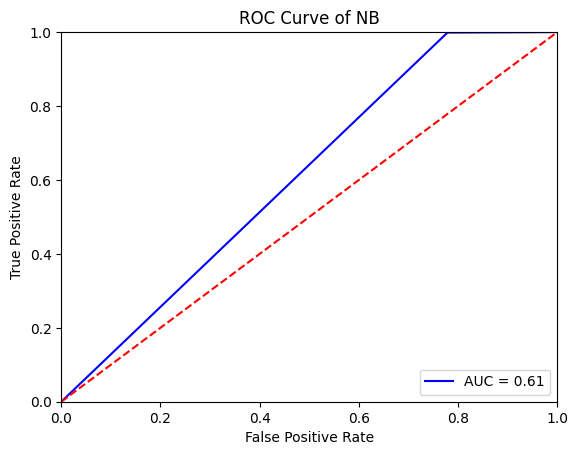

In [ ]:
show_roc_curve(best_nb, 'NB', X_test, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "NB", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
kNN       2.07e-02   2.52e-01      0.99    0.99       0.98      0.99
NB        6.98e-03   1.10e-03      0.69    1.00       0.62      0.76


## Logistic Regression

Lojistik regresyon analizi sınıflama ve atama işlemi yapmaya yardımcı olan bir regresyon yöntemidir. Ayırma (Diskriminant) analizi verilerin sınıflandırılması ve belirli olasılıklara göre belirli sınıflara atanmasını sağlayan bir yöntemdir.

In [ ]:
lr = LogisticRegression(max_iter=500)
param_grid = {
    'solver': np.array(['newton-cg', 'lbfgs', 'liblinear']), 
    'penalty': np.array(['l2']), 
    'C': np.array([100, 10, 1.0, 0.1, 0.01])
}
lr_gscv = GridSearchCV(lr, param_grid, cv=5, return_train_score=True)
lr_gscv.fit(X_train_scaled, y_train);
pd.DataFrame(lr_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,2,0,1,3,4
mean_fit_time,0.03,0.16,0.09,0.06,0.07
std_fit_time,0.0,0.05,0.02,0.01,0.01
mean_score_time,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0
param_C,100.0,100.0,100.0,10.0,10.0
param_penalty,l2,l2,l2,l2,l2
param_solver,liblinear,newton-cg,lbfgs,newton-cg,lbfgs
params,"{'C': 100.0, 'penalty': 'l2', 'solver': 'libli...","{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...","{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}","{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...","{'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}"
split0_test_score,0.93,0.93,0.93,0.91,0.91
split1_test_score,0.92,0.92,0.92,0.91,0.91


In [ ]:
print(f"En iyi parametreler {lr_gscv.best_params_}, en iyi skor {lr_gscv.best_score_}")

En iyi parametreler {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}, en iyi skor 0.9268645357686454


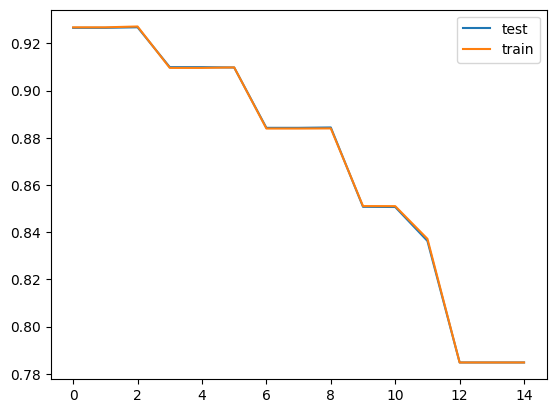

In [ ]:
accuracy_graph(lr_gscv)

In [ ]:
start = time.time()
best_lr = LogisticRegression(max_iter=500, solver="liblinear", penalty="l2", C=100.0)
best_lr.fit(X_train_scaled, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 0.09591341018676758s


In [ ]:
start = time.time()
y_test_pred = best_lr.predict(X_test_scaled)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.00201416015625s


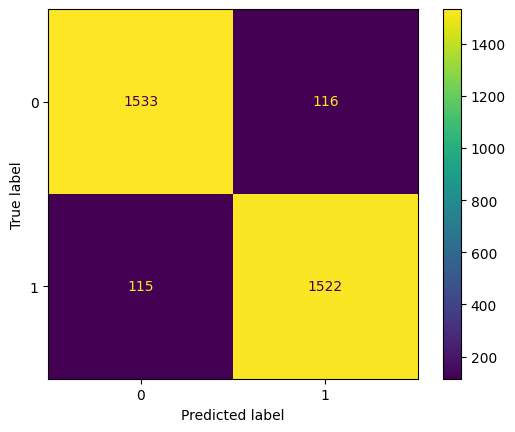

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.93      0.93      0.93      1649
       Fraud       0.93      0.93      0.93      1637

    accuracy                           0.93      3286
   macro avg       0.93      0.93      0.93      3286
weighted avg       0.93      0.93      0.93      3286



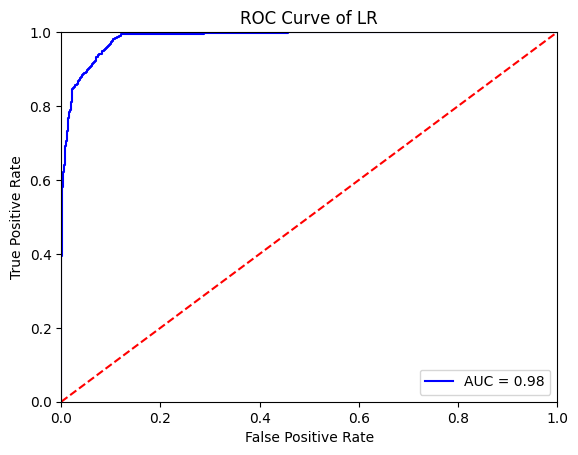

In [ ]:
show_roc_curve(best_lr, 'LR', X_test_scaled, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "LR", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
kNN       2.07e-02   2.52e-01      0.99    0.99       0.98      0.99
LR        9.59e-02   2.01e-03      0.93    0.93       0.93      0.93
NB        6.98e-03   1.10e-03      0.69    1.00       0.62      0.76


## Decision Tree

Bir karar ağacı, çok sayıda kayıt içeren bir veri kümesini, bir dizi karar kuralları uygulayarak daha küçük kümelere bölmek için kullanılan bir yapıdır. Yani basit karar verme adımları uygulanarak, büyük miktarlardaki kayıtları, çok küçük kayıt gruplarına bölerek kullanılan bir yapıdır.

In [ ]:
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dt_gscv = GridSearchCV(dt, param_grid, cv=5, return_train_score=True)
dt_gscv.fit(X_train_scaled, y_train)
pd.DataFrame(dt_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,15,20,45,40,41
mean_fit_time,0.03,0.03,0.03,0.03,0.03
std_fit_time,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0
param_criterion,gini,gini,entropy,entropy,entropy
param_max_depth,10,20,20,10,10
param_min_samples_leaf,5,5,5,5,10
params,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...","{'criterion': 'gini', 'max_depth': 20, 'min_sa...","{'criterion': 'entropy', 'max_depth': 20, 'min...","{'criterion': 'entropy', 'max_depth': 10, 'min...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
split0_test_score,0.99,0.99,0.99,0.99,0.99
split1_test_score,0.99,0.99,0.99,0.99,0.99


In [ ]:
print(f"En iyi parametreler {dt_gscv.best_params_}, en iyi skor {dt_gscv.best_score_}")

En iyi parametreler {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}, en iyi skor 0.9907914764079149


In [ ]:
start = time.time()
best_dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, criterion="gini")
best_dt.fit(X_train_scaled, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 0.08440804481506348s


In [ ]:
start = time.time()
y_test_pred = best_dt.predict(X_test_scaled)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.005831480026245117s


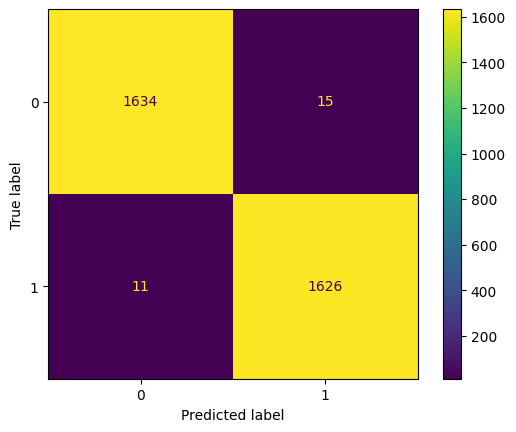

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99      1649
       Fraud       0.99      0.99      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



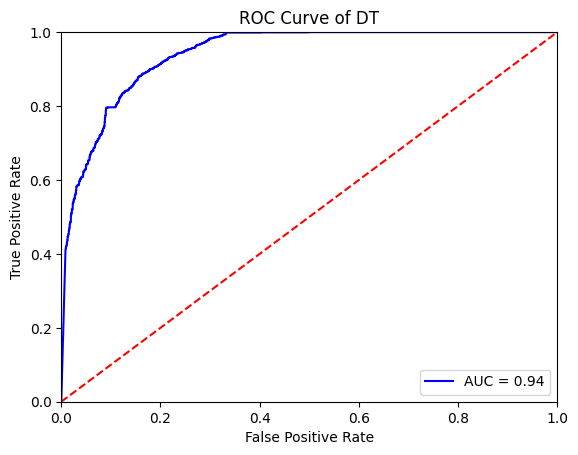

In [ ]:
show_roc_curve(best_dt, 'DT', X_test_scaled, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "DT", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
DT        8.44e-02   5.83e-03      0.99    0.99       0.99      0.99
kNN       2.07e-02   2.52e-01      0.99    0.99       0.98      0.99
LR        9.59e-02   2.01e-03      0.93    0.93       0.93      0.93
NB        6.98e-03   1.10e-03      0.69    1.00       0.62      0.76


## RandomForest

Karar ağaçlarının en büyük problemlerinden biri aşırı öğrenme-veriyi ezberlemedir (overfitting). Rassal orman modeli bu problemi çözmek için hem veri setinden hem de öznitelik setinden rassal olarak onlarca yüzlerce farklı alt-setler seçiyor ve bunları eğitiyor. Bu yöntemle yüzlerce karar ağacı oluşturuluyor ve her bir karar ağacı bireysel olarak tahminde bulunuyor. En çok oy alanı sonuç olarak veriyor.

In [ ]:
rf = RandomForestClassifier()
param_grid = {
  'max_depth': [2, 3, 5, 10, 20],
  'min_samples_leaf': [5, 10, 20, 50, 100],
  'n_estimators': [100, 150, 200]
}
rf_gscv = GridSearchCV(rf, param_grid, cv=5, return_train_score=True)
rf_gscv.fit(X_train_scaled, y_train)
pd.DataFrame(rf_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,62,61,60,46,45
mean_fit_time,1.86,1.4,0.89,1.27,0.82
std_fit_time,0.31,0.25,0.16,0.18,0.08
mean_score_time,0.08,0.06,0.04,0.06,0.03
std_score_time,0.02,0.01,0.01,0.01,0.0
param_max_depth,20,20,20,10,10
param_min_samples_leaf,5,5,5,5,5
param_n_estimators,200,150,100,150,100
params,"{'max_depth': 20, 'min_samples_leaf': 5, 'n_es...","{'max_depth': 20, 'min_samples_leaf': 5, 'n_es...","{'max_depth': 20, 'min_samples_leaf': 5, 'n_es...","{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...","{'max_depth': 10, 'min_samples_leaf': 5, 'n_es..."
split0_test_score,0.99,0.99,0.99,0.99,0.99
split1_test_score,0.99,0.99,0.99,0.99,0.99


In [ ]:
print(f"En iyi parametreler {rf_gscv.best_params_}, en iyi skor {rf_gscv.best_score_}")

En iyi parametreler {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}, en iyi skor 0.99117199391172


In [ ]:
start = time.time()
best_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200)
best_rf.fit(X_train_scaled, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 7.278512239456177s


In [ ]:
start = time.time()
y_test_pred = best_rf.predict(X_test_scaled)
stop = time.time()
test_time = stop - start
print(f"Eğitim süresi: {test_time}s")

Eğitim süresi: 0.09719276428222656s


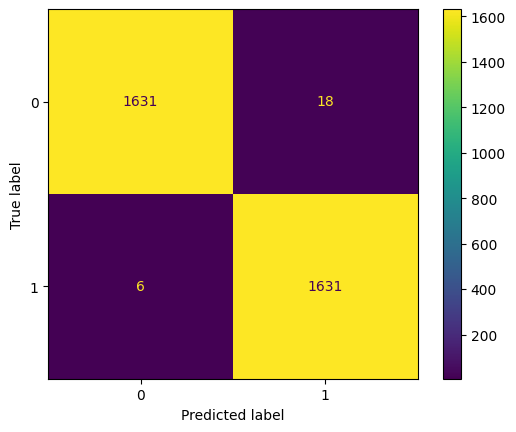

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99      1649
       Fraud       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



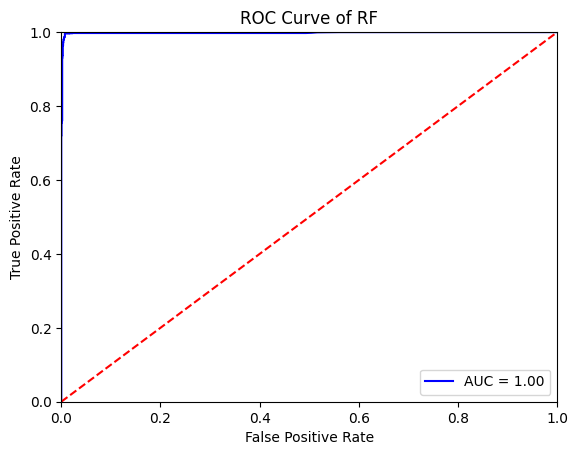

In [ ]:
show_roc_curve(best_rf, 'RF', X_test_scaled, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "RF", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
RF        7.28e+00   9.72e-02      0.99    1.00       0.99      0.99
DT        8.44e-02   5.83e-03      0.99    0.99       0.99      0.99
kNN       2.07e-02   2.52e-01      0.99    0.99       0.98      0.99
LR        9.59e-02   2.01e-03      0.93    0.93       0.93      0.93
NB        6.98e-03   1.10e-03      0.69    1.00       0.62      0.76


## Gradient Boosting

Boosting, zayıf öğrenicileri(weak learner) güçlü öğreniciye(strong learner) dönüştürme yöntemidir. Bunu iterasyonlar ile aşamalı olarak yapar. Boosting algoritmaları arasındaki fark genellikle zayıf öğrenicilerin eksikliğini nasıl tanımladıklarıdır. 

Gradient Boosting’de öncelikli olarak ilk yaprak(initial leaf) oluşturulur. Sonrasında tahmin hataları göz önüne alınarak yeni ağaçlar oluşturulur. Bu durum karar verilen ağaç sayısına ya da modelden daha fazla gelişme kaydedilemeyinceye kadar devam eder.

In [ ]:
gb = GradientBoostingClassifier()
param_grid = {
  'max_depth': np.arange(5,9, 1),
  'min_samples_leaf': [1, 2, 4],
  'n_estimators': [100, 150, 200]
}
gb_gscv = GridSearchCV(gb, param_grid, cv=5, return_train_score=True)
gb_gscv.fit(X_train_scaled, y_train)
pd.DataFrame(gb_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,33,30,35,26,32
mean_fit_time,3.62,3.62,7.99,6.87,7.81
std_fit_time,0.53,0.55,1.05,0.33,0.76
mean_score_time,0.01,0.01,0.02,0.02,0.02
std_score_time,0.0,0.0,0.0,0.0,0.0
param_max_depth,8,8,8,7,8
param_min_samples_leaf,4,2,4,4,2
param_n_estimators,100,100,200,200,200
params,"{'max_depth': 8, 'min_samples_leaf': 4, 'n_est...","{'max_depth': 8, 'min_samples_leaf': 2, 'n_est...","{'max_depth': 8, 'min_samples_leaf': 4, 'n_est...","{'max_depth': 7, 'min_samples_leaf': 4, 'n_est...","{'max_depth': 8, 'min_samples_leaf': 2, 'n_est..."
split0_test_score,0.99,0.99,0.99,0.99,0.99
split1_test_score,0.99,0.99,0.99,0.99,0.99


In [ ]:
print(f"En iyi parametreler {gb_gscv.best_params_}, en iyi skor {gb_gscv.best_score_}")

En iyi parametreler {'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 100}, en iyi skor 0.9930745814307459


In [ ]:
start = time.time()
best_gb = GradientBoostingClassifier(max_depth=7, min_samples_leaf=1, n_estimators=100)
best_gb.fit(X_train_scaled, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 4.511935234069824s


In [ ]:
start = time.time()
y_test_pred = best_gb.predict(X_test_scaled)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Eğitim süresi: 0.018042325973510742s


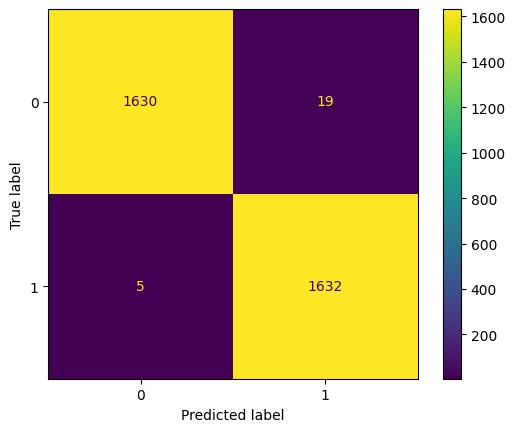

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99      1649
       Fraud       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



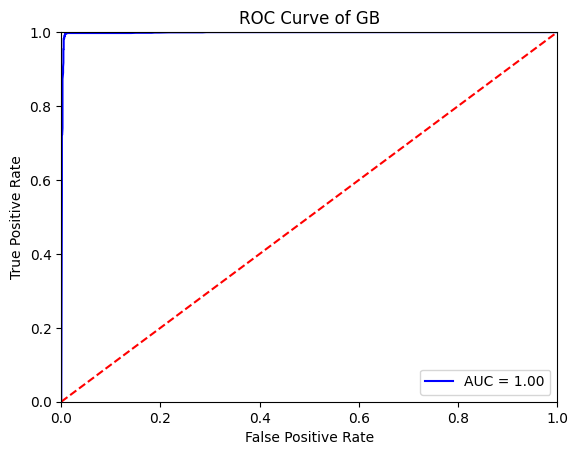

In [ ]:
show_roc_curve(best_gb, 'GB', X_test_scaled, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "GB", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
GB        4.51e+00   1.80e-02      0.99    1.00       0.99      0.99
RF        7.28e+00   9.72e-02      0.99    1.00       0.99      0.99
DT        8.44e-02   5.83e-03      0.99    0.99       0.99      0.99
kNN       2.07e-02   2.52e-01      0.99    0.99       0.98      0.99
LR        9.59e-02   2.01e-03      0.93    0.93       0.93      0.93
NB        6.98e-03   1.10e-03      0.69    1.00       0.62      0.76


## Sonuçların Karşılaştırılması

Kullanılan tüm algoritmaların en iyi optimize hallerinin karşılaştırılmasında Logistic Regression ve Naive Bayes hariç geri kalanlarının tamamının f1 Skorunun 0.99 olduğu görülmüştür. Bunların içerisinde en hızlı eğitim süresi tabi ki kNN’de daha sonra Decision Tree’de ve test süresi yine en hızlı Decision Tree’dir.

## Undersampling Yapılmadan Modelleme

In [18]:
dataset.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,181.00
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,181.00
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14


In [28]:
clean_data = dataset[(dataset['type'] == 'CASH_OUT') | (dataset['type'] == 'TRANSFER')]
clean_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00e+00,1,0,181.0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00e+00,1,0,181.0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,5.15e+04,0,0,15325.0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00e+00,0,0,705.0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2.72e+06,0,0,10835.0


In [29]:
clean_data["type"] = clean_data["type"].map({"CASH_OUT": 1, "TRANSFER": 2})
clean_data.head()

<ipython-input-29-cfed4c80fa12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["type"] = clean_data["type"].map({"CASH_OUT": 1, "TRANSFER": 2})


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
2,1,2,181.00,181.0,0.0,0.0,0.00e+00,1,0,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00e+00,1,0,181.0
15,1,1,229133.94,15325.0,0.0,5083.0,5.15e+04,0,0,15325.0
19,1,2,215310.30,705.0,0.0,22425.0,0.00e+00,0,0,705.0
24,1,2,311685.89,10835.0,0.0,6267.0,2.72e+06,0,0,10835.0


In [15]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
 9   balance_diff    float64
dtypes: float64(6), int64(4)
memory usage: 232.5 MB


In [30]:
clean_data.shape

(2770409, 10)

In [31]:
clean_y = clean_data['isFraud']
clean_X = clean_data.drop(['step', 'oldbalanceDest','newbalanceDest', 'isFraud', 'isFlaggedFraud'], axis=1)
clean_X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,balance_diff
2,2,181.00,181.0,0.0,181.0
3,1,181.00,181.0,0.0,181.0
15,1,229133.94,15325.0,0.0,15325.0
19,2,215310.30,705.0,0.0,705.0
24,2,311685.89,10835.0,0.0,10835.0


In [33]:
clean_X_train, clean_X_test, clean_y_train, clean_y_test = train_test_split(clean_X, clean_y, test_size=0.2, random_state=42)
clean_X_train.shape

(2216327, 5)

In [34]:
sc = MinMaxScaler()
clean_X_train = sc.fit_transform(clean_X_train)
clean_X_test = sc.transform(clean_X_test)

In [68]:
model_performance = pd.DataFrame(columns=['Training Time', 'Test Time', 'Accuracy','Recall','Precision','F1-Score'])

## kNN

In [66]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=1, p=2)
knn.fit(clean_X_train, clean_y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 11.680533409118652s


In [67]:
start = time.time()
clean_y_test_pred = knn.predict(clean_X_test)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 81.92551708221436s


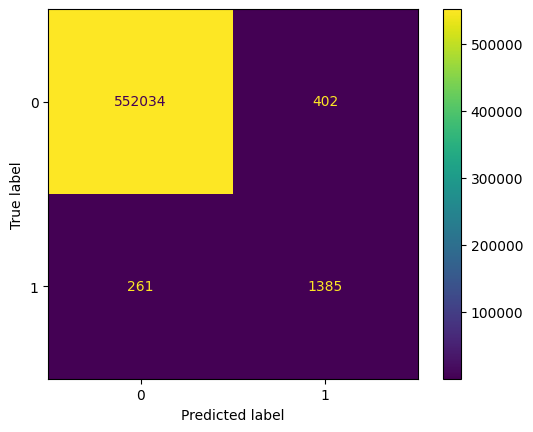

In [69]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(clean_y_test, clean_y_test_pred)).plot()
plt.show(block=True);

In [70]:
print(classification_report(clean_y_test, clean_y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    552436
       Fraud       0.78      0.84      0.81      1646

    accuracy                           1.00    554082
   macro avg       0.89      0.92      0.90    554082
weighted avg       1.00      1.00      1.00    554082



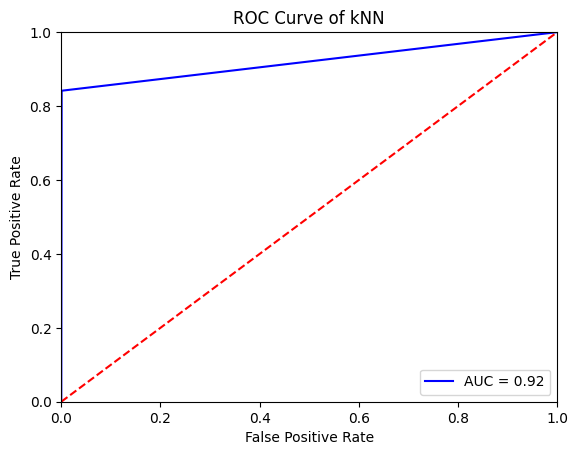

In [71]:
show_roc_curve(knn, 'kNN', clean_X_test, clean_y_test)

In [72]:
add_scores(clean_y_test, clean_y_test_pred, "kNN", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
kNN          11.68      81.93       1.0    0.84       0.78      0.81


## Naive Bayes

In [73]:
start = time.time()
nb = GaussianNB(var_smoothing=3.5111917342151275e-06)
nb.fit(clean_X_train, clean_y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 0.45131373405456543s


In [74]:
start = time.time()
clean_y_test_pred = nb.predict(clean_X_test)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.047286033630371094s


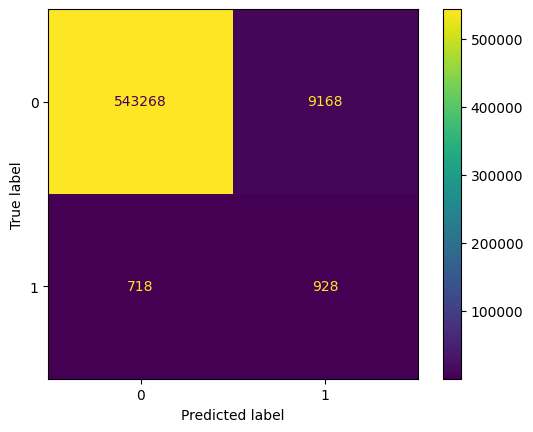

In [75]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(clean_y_test, clean_y_test_pred)).plot()
plt.show(block=True);

In [76]:
print(classification_report(clean_y_test, clean_y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99    552436
       Fraud       0.09      0.56      0.16      1646

    accuracy                           0.98    554082
   macro avg       0.55      0.77      0.57    554082
weighted avg       1.00      0.98      0.99    554082



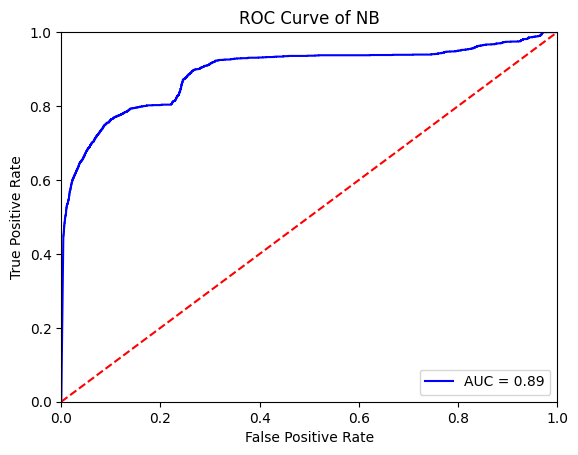

In [77]:
show_roc_curve(nb, 'NB', clean_X_test, clean_y_test)

In [78]:
add_scores(clean_y_test, clean_y_test_pred, "NB", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
kNN          11.68      81.93      1.00    0.84       0.78      0.81
NB            0.45       0.05      0.98    0.56       0.09      0.16


## Logistic Regression

In [80]:
start = time.time()
lr = LogisticRegression(max_iter=500, solver="liblinear", penalty="l2", C=100.0)
lr.fit(clean_X_train, clean_y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 14.494893789291382s


In [81]:
start = time.time()
clean_y_test_pred = lr.predict(clean_X_test)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.018218994140625s


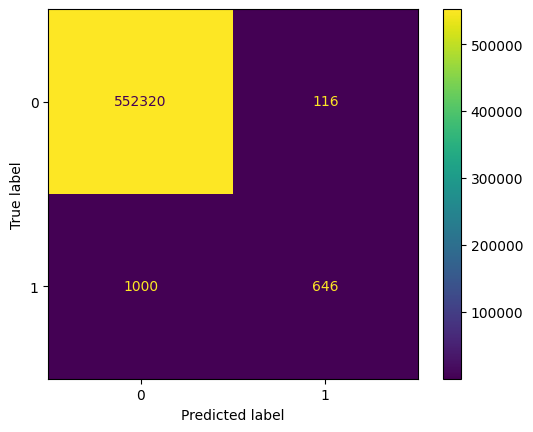

In [82]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(clean_y_test, clean_y_test_pred)).plot()
plt.show(block=True);

In [83]:
print(classification_report(clean_y_test, clean_y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    552436
       Fraud       0.85      0.39      0.54      1646

    accuracy                           1.00    554082
   macro avg       0.92      0.70      0.77    554082
weighted avg       1.00      1.00      1.00    554082



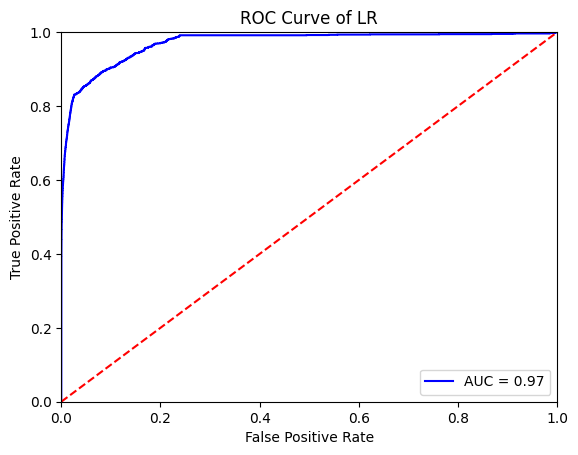

In [84]:
show_roc_curve(lr, 'LR', clean_X_test, clean_y_test)

In [85]:
add_scores(clean_y_test, clean_y_test_pred, "LR", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
kNN          11.68      81.93      1.00    0.84       0.78      0.81
LR           14.49       0.02      1.00    0.39       0.85      0.54
NB            0.45       0.05      0.98    0.56       0.09      0.16


## Decision Tree

In [93]:
start = time.time()
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, criterion="gini")
dt.fit(clean_X_train, clean_y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 12.172691822052002s


In [94]:
start = time.time()
clean_y_test_pred = dt.predict(clean_X_test)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.045967817306518555s


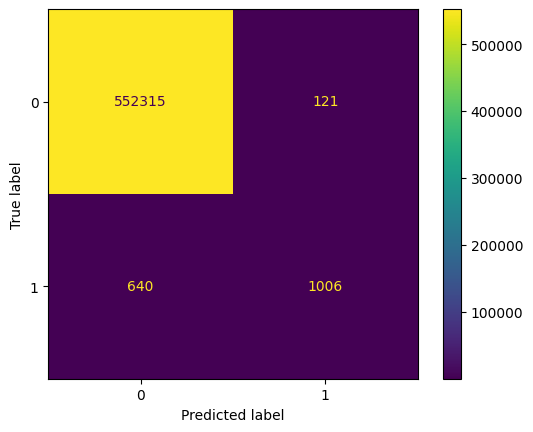

In [95]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(clean_y_test, clean_y_test_pred)).plot()
plt.show(block=True);

In [96]:
print(classification_report(clean_y_test, clean_y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    552436
       Fraud       0.89      0.61      0.73      1646

    accuracy                           1.00    554082
   macro avg       0.95      0.81      0.86    554082
weighted avg       1.00      1.00      1.00    554082



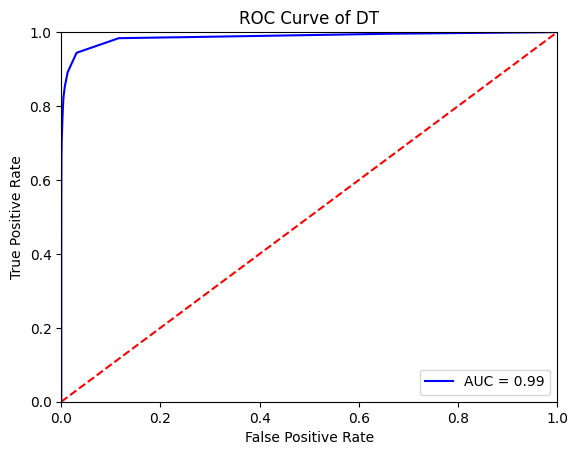

In [97]:
show_roc_curve(dt, 'DT', clean_X_test, clean_y_test)

In [98]:
add_scores(clean_y_test, clean_y_test_pred, "DT", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
kNN          11.68      81.93      1.00    0.84       0.78      0.81
DT           12.17       0.05      1.00    0.61       0.89      0.73
LR           14.49       0.02      1.00    0.39       0.85      0.54
NB            0.45       0.05      0.98    0.56       0.09      0.16


## Random Forest

In [100]:
start = time.time()
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200)
rf.fit(clean_X_train, clean_y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 1207.0350766181946s


In [101]:
start = time.time()
clean_y_test_pred = rf.predict(clean_X_test)
stop = time.time()
test_time = stop - start
print(f"Eğitim süresi: {test_time}s")

Eğitim süresi: 10.42356824874878s


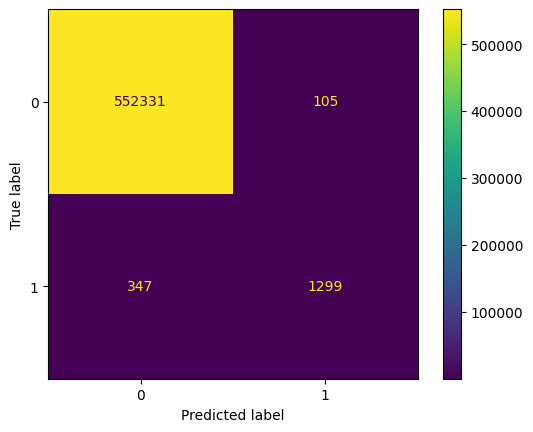

In [102]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(clean_y_test, clean_y_test_pred)).plot()
plt.show(block=True);

In [103]:
print(classification_report(clean_y_test, clean_y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    552436
       Fraud       0.93      0.79      0.85      1646

    accuracy                           1.00    554082
   macro avg       0.96      0.89      0.93    554082
weighted avg       1.00      1.00      1.00    554082



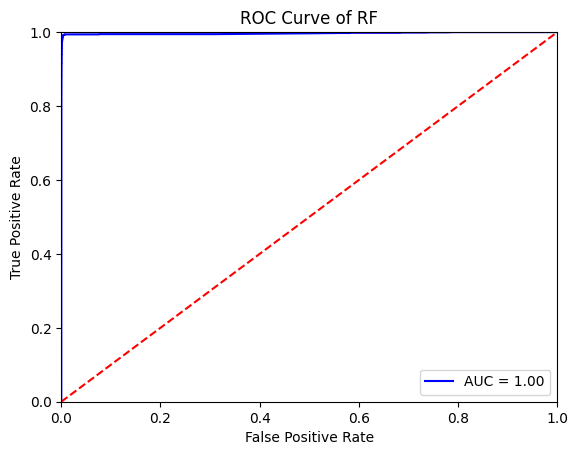

In [104]:
show_roc_curve(rf, 'RF', clean_X_test, clean_y_test)

In [105]:
add_scores(clean_y_test, clean_y_test_pred, "RF", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
RF         1207.04      10.42      1.00    0.79       0.93      0.85
kNN          11.68      81.93      1.00    0.84       0.78      0.81
DT           12.17       0.05      1.00    0.61       0.89      0.73
LR           14.49       0.02      1.00    0.39       0.85      0.54
NB            0.45       0.05      0.98    0.56       0.09      0.16


## Gradient Boosting

In [106]:
start = time.time()
gb = GradientBoostingClassifier(max_depth=7, min_samples_leaf=1, n_estimators=100)
gb.fit(clean_X_train, clean_y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 885.5161364078522s


In [107]:
start = time.time()
clean_y_test_pred = gb.predict(clean_X_test)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 1.3259353637695312s


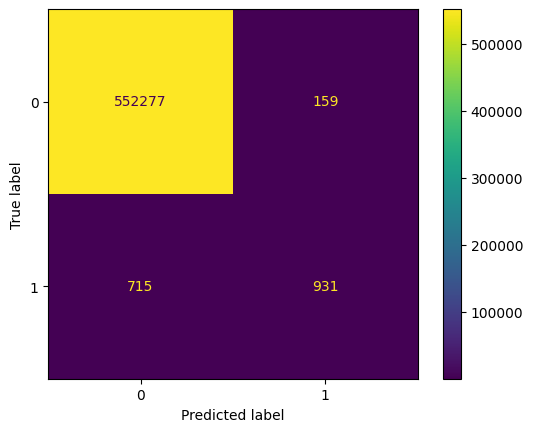

In [108]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(clean_y_test, clean_y_test_pred)).plot()
plt.show(block=True);

In [109]:
print(classification_report(clean_y_test, clean_y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    552436
       Fraud       0.85      0.57      0.68      1646

    accuracy                           1.00    554082
   macro avg       0.93      0.78      0.84    554082
weighted avg       1.00      1.00      1.00    554082



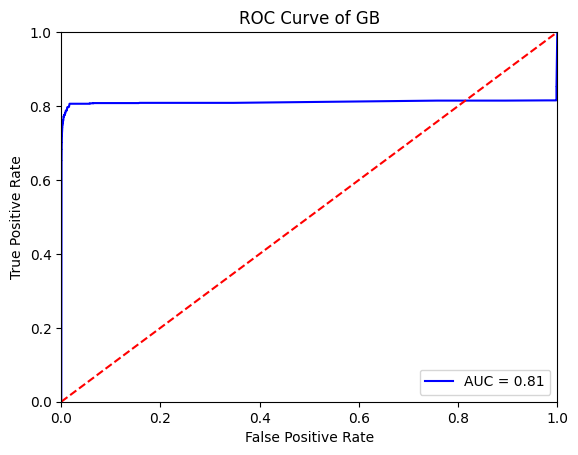

In [110]:
show_roc_curve(gb, 'GB', clean_X_test, clean_y_test)

In [111]:
add_scores(clean_y_test, clean_y_test_pred, "GB", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
RF         1207.04      10.42      1.00    0.79       0.93      0.85
kNN          11.68      81.93      1.00    0.84       0.78      0.81
DT           12.17       0.05      1.00    0.61       0.89      0.73
GB          885.52       1.33      1.00    0.57       0.85      0.68
LR           14.49       0.02      1.00    0.39       0.85      0.54
NB            0.45       0.05      0.98    0.56       0.09      0.16
